In [121]:
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import dblquad
from tqdm import tqdm
import urllib.request

In [122]:
def f(x,y):
    r = np.sqrt(np.square(x) + np.square(y))
    if r > 1:
        return 0
    h = np.sqrt(1-np.square(r))
    return h

In [123]:
N = 2000
R = 1

X, dx = np.linspace(-R, R , N+1, retstep = True)
Y, dy = np.linspace(-R, R , N+1, retstep = True)

X2 = np.linspace(-R, R , N)
Y2 = np.linspace(-R, R , N)

area = dx*dy

In [124]:
H = np.zeros((len(X), len(Y)))
Squares = np.zeros((N, N))
HFinal = np.zeros((N, N))

print(H.shape,Squares.shape)

for i in range(len(X)):
    for j in range(len(Y)):
        h = f(X[i], Y[j])
        H[i, j] = h

for i in range(N):
    for j in range(N):
        suma = 0
        for s in range(2):
            for t in range(2):
                suma += H[i+s, j+t]
                
        altura_final = (suma/4)*(area)
        if altura_final <= 1:
            Squares[i, j] = altura_final
            
for i in range(N):
    for j in range(N):
        try:
            HFinal[i,j] = H[i,j]
        except:
            HFinal[i,j] = 0

(2001, 2001) (2000, 2000)


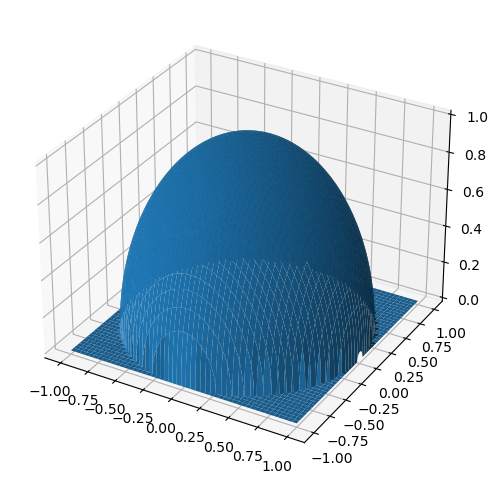

In [125]:
Xm, Ym = np.meshgrid(X2, Y2)       


fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xm,Ym,HFinal)

In [127]:
volTotal = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        volTotal += Squares[i,j]
    
volTotal

2.094393636431784